<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(glove).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
# url1 = 'https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataisear(preputama).csv'
# url2 = 'tba'
df = pd.read_csv(url0)
# df.iloc[:,1]

In [60]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: emosi, dtype: int64

In [ ]:
df=df.drop(df[df['emosi'] == 'anger'].sample(frac=1).index)
df=df.drop(df[df['emosi'] == 'disgust'].sample(frac=1).index)

In [61]:
df.head()

,emosi,dokumen
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df2 = pd.read_csv('/content/drive/MyDrive/twitter_prosessed.csv')

preputama : lower case

In [64]:
df['dokumen']=df['dokumen'].str.lower()
# print(df.iloc[4,1])

In [65]:
df2['tweet']=df2['tweet'].str.lower()

preputama : Pembersihan noise (over enter and space)

In [66]:
df=df.replace(' \n', ' ', regex=True)
df=df.replace('   ', ' ', regex=True)
df=df.replace('  ', ' ', regex=True)

In [67]:
df2=df2.replace(' \n', ' ', regex=True)
df2=df2.replace('   ', ' ', regex=True)
df2=df2.replace('  ', ' ', regex=True)

preptambah : expand contractions

In [68]:
!pip install contractions
import contractions

In [69]:
df[df['dokumen'].str.contains("couldn't")]

,emosi,dokumen
124,disgust,"when i saw a picture, in the gothenburg post, ..."
526,anger,a friend suggested in a round-about way that t...
545,fear,"i was rock-climbing and absailing & felt ok, b..."
553,anger,"getting a terrible exam mark, which i couldn't..."
673,fear,"after seeing a terror movie at the cinema, i w..."
...,...,...
6589,joy,when my boyfriend came form rumphi to lilongwe...
6592,sadness,i wrote a letter to my boyfriend but he couldn...
6595,guilt,one day i found an incontinent man in the ward...
6624,joy,it was in 1983 september when mce results were...


In [70]:
expanded_words = []    

In [71]:
for word in df.dokumen:
  expanded_words.append(contractions.fix(word))

In [72]:
np.shape(expanded_words)

(7516,)

In [73]:
df.dokumen=expanded_words

In [74]:
df[df['dokumen'].str.contains("couldn't")]

,emosi,dokumen


In [75]:
expanded_words = []
for word in df2.tweet:
  expanded_words.append(contractions.fix(word))

In [76]:
df2.tweet=expanded_words

In [77]:
df2.head()

,tweet
0,is upset that he cannot update his facebook by...
1,i dived many times for the ball. managed to sa...
2,my whole body feels itchy and like its on fire
3,"no, it is not behaving at all. I am mad. why a..."
4,not the whole crew


preputama : cleansing

In [78]:
df['dokumen'] = df['dokumen'].str.replace(r'[^\w\s]+', '')

In [79]:
df.shape

(7516, 2)

In [80]:
df2['tweet'] = df2['tweet'].str.replace(r'[^\w\s]+', '')

preptambah : remove stopword

In [81]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
df['dokumen'] = df['dokumen'].str.replace(pat, '')
df['dokumen'] = df['dokumen'].str.replace(r'\s+', ' ')

In [83]:
df.head()

,emosi,dokumen
0,joy,days feel close partner friends feel peace al...
1,fear,every time imagine someone love could contact ...
2,anger,obviously unjustly treated possibility elucid...
3,sadness,think short time live relate periods life thi...
4,disgust,gathering found involuntarily sitting next tw...


In [84]:
df.shape

(7516, 2)

In [85]:
df2['tweet'] = df2['tweet'].str.replace(pat, '')
df2['tweet'] = df2['tweet'].str.replace(r'\s+', ' ')

preputama : Lemmatization(d laporan salah tkoniize word)

In [86]:
sentences = [word_tokenize(x) for x in df.dokumen] 
# df = pd.DataFrame(df.apply(list,axis=1), columns=['dokumen'])

In [87]:
df.dokumen=sentences

In [88]:
sentences = [word_tokenize(x) for x in df2.tweet]

In [89]:
df2.tweet=sentences

preptambah : steming (di laporan lematization salah karna lematization = tokenize)

In [90]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [91]:
# temp = df.dokumen.apply(lambda x: [stemmer.stem(y) for y in x])
df['dokumen'].apply(lambda x: [stemmer.stem(y) for y in x])

0       [day, feel, close, partner, friend, feel, peac...
1       [everi, time, imagin, someon, love, could, con...
2               [obvious, unjust, treat, possibl, elucid]
3       [think, short, time, live, relat, period, life...
4       [gather, found, involuntarili, sit, next, two,...
                              ...                        
7511    [two, year, back, someon, invit, tutor, grandd...
7512    [taken, respons, someth, prepar, howev, fail, ...
7513    [home, heard, loud, sound, spit, outsid, door,...
7514          [homework, teacher, ask, us, scold, immedi]
7515    [shout, younger, brother, alway, afraid, call,...
Name: dokumen, Length: 7516, dtype: object

In [92]:
df2['tweet'].apply(lambda x: [stemmer.stem(y) for y in x])

0          [upset, can, not, updat, facebook, text, might...
1          [dive, mani, time, ball, manag, save, 50, rest...
2                     [whole, bodi, feel, itchi, like, fire]
3                             [behav, i, mad, can, not, see]
4                                              [whole, crew]
                                 ...                        
1596959                     [woke, school, best, feel, ever]
1596960     [thewdbcom, cool, hear, old, walt, interview, â]
1596961                   [readi, mojo, makeov, ask, detail]
1596962    [happi, 38th, birthday, boo, alll, time, tupac...
1596963                                              [happi]
Name: tweet, Length: 1596964, dtype: object

In [93]:
df.head()

,emosi,dokumen
0,joy,"[days, feel, close, partner, friends, feel, pe..."
1,fear,"[every, time, imagine, someone, love, could, c..."
2,anger,"[obviously, unjustly, treated, possibility, el..."
3,sadness,"[think, short, time, live, relate, periods, li..."
4,disgust,"[gathering, found, involuntarily, sitting, nex..."


save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

gabung corpus

In [109]:
df2.tweet

0          [upset, can, not, update, facebook, texting, m...
1          [dived, many, times, ball, managed, save, 50, ...
2                    [whole, body, feels, itchy, like, fire]
3                          [behaving, I, mad, can, not, see]
4                                              [whole, crew]
                                 ...                        
1596959                  [woke, school, best, feeling, ever]
1596960    [thewdbcom, cool, hear, old, walt, interviews, â]
1596961                [ready, mojo, makeover, ask, details]
1596962    [happy, 38th, birthday, boo, alll, time, tupac...
1596963                                              [happy]
Name: tweet, Length: 1596964, dtype: object

In [110]:
df.dokumen

0       [days, feel, close, partner, friends, feel, pe...
1       [every, time, imagine, someone, love, could, c...
2       [obviously, unjustly, treated, possibility, el...
3       [think, short, time, live, relate, periods, li...
4       [gathering, found, involuntarily, sitting, nex...
                              ...                        
7511    [two, years, back, someone, invited, tutor, gr...
7512    [taken, responsibility, something, prepared, h...
7513    [home, heard, loud, sound, spitting, outside, ...
7514    [homework, teacher, asked, us, scolded, immedi...
7515    [shouted, younger, brother, always, afraid, ca...
Name: dokumen, Length: 7516, dtype: object

In [111]:
sent=df2.tweet.append(df.dokumen,ignore_index=True)

In [112]:
sent

0          [upset, can, not, update, facebook, texting, m...
1          [dived, many, times, ball, managed, save, 50, ...
2                    [whole, body, feels, itchy, like, fire]
3                          [behaving, I, mad, can, not, see]
4                                              [whole, crew]
                                 ...                        
1604475    [two, years, back, someone, invited, tutor, gr...
1604476    [taken, responsibility, something, prepared, h...
1604477    [home, heard, loud, sound, spitting, outside, ...
1604478    [homework, teacher, asked, us, scolded, immedi...
1604479    [shouted, younger, brother, always, afraid, ca...
Length: 1604480, dtype: object

glove

In [96]:
!pip install glove-python-binary

In [97]:
from glove import Glove
from glove import Corpus

In [98]:
len(df)

7516

In [113]:
korpus = Corpus()
korpus.fit(sent, window=10, ignore_missing=False)

In [114]:
glove = Glove(no_components=100, learning_rate=0.05, alpha=0.75, max_count=100, max_loss=10.0, random_state=None)
glove.fit(korpus.matrix)
glove.add_dictionary(korpus.dictionary)

cek moedel

In [108]:
glove.word_vectors.shape

(9192, 100)

In [103]:
glove.word_vectors[glove.dictionary['moment']]

array([ 0.22243754,  0.2274054 ,  0.08513214, -0.14215162, -0.09420645,
       -0.06672418, -0.15234222,  0.21785222, -0.19741017, -0.1670975 ,
       -0.07691235,  0.10656462, -0.21858374, -0.06718829,  0.21258012,
        0.13662095, -0.16190639, -0.12828338, -0.12544878,  0.02436465,
       -0.12476156, -0.18231814, -0.06854462,  0.12067984, -0.10423987,
        0.01157009, -0.12856953, -0.12474134,  0.16462345,  0.21990828,
        0.21296507,  0.05655733, -0.2037912 , -0.12587101,  0.02415313,
        0.12432115,  0.17220286,  0.12246233, -0.10596404,  0.13876302,
       -0.12391164, -0.14754645, -0.12866415, -0.12968585,  0.01730059,
        0.17086745,  0.16328133, -0.1536196 ,  0.0712546 , -0.1494993 ,
        0.1293897 , -0.17161883, -0.11439104, -0.2071892 , -0.10698503,
       -0.16401574,  0.02798692,  0.09401588, -0.16297855,  0.17226434,
       -0.15580861, -0.14789317,  0.10358262,  0.05108098, -0.02383867,
       -0.20386039,  0.15789271, -0.08351406, -0.14407838,  0.11

ekstraksi fitur

In [115]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,glove.word_vectors[glove.dictionary[word]])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

In [116]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(7516, 100)
(7516,)


klasifikasi svm

In [117]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# langsung cari score

# clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# scores = cross_val_score(clf, X, y, cv=10)
# # scores.mean()

0.2851325891718843

conf matrix dan akurasi

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

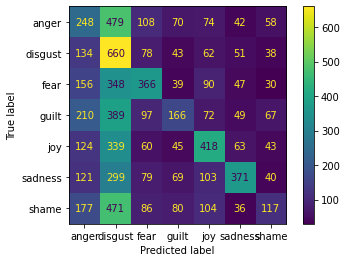

0.3121341138903672
(0.35565851303648516, 0.31173349621950386, 0.3050338301616461, None)


In [121]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()
print(accuracy_score(y, y_pred))
print(precision_recall_fscore_support(y, y_pred, average='macro'))

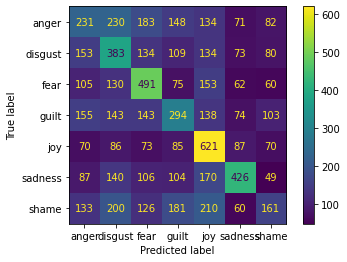

0.34686003193187864
(0.34127926014770577, 0.3460596189627266, 0.3372679140969354, None)


In [122]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()
print(accuracy_score(y, y_pred))
print(precision_recall_fscore_support(y, y_pred, average='macro'))

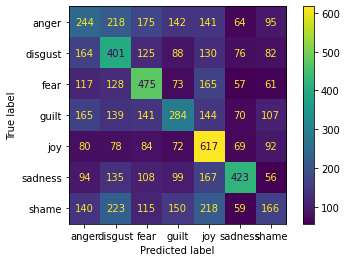

0.34725918041511444
(0.34379215516915135, 0.34645575259221484, 0.3388700073396088, None)


In [123]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()
print(accuracy_score(y, y_pred))
print(precision_recall_fscore_support(y, y_pred, average='macro'))